In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [ ]:
# Cargar la base de datos
df = pd.read_excel("lending_dataset.xlsx")

# Visualización de la estructura inicial del DataFrame
df.head()

,index,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,revol_util,application_type,pub_rec_bankruptcies
0,1,2400,36,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,s,small_business,IL,8.72,0.0,98.5,Individual,0.0
1,2,10000,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Fully Paid,s,other,CA,20.00,0.0,21.0,Individual,0.0
2,3,3000,36,18.64,109.43,E,MKC Accounting,9 years,RENT,48000.0,Source Verified,Fully Paid,s,car,CA,5.35,0.0,87.5,Individual,0.0
3,4,5600,60,21.28,152.39,F,NaN,4 years,OWN,40000.0,Source Verified,Charged Off,s,small_business,CA,5.55,0.0,32.6,Individual,0.0
4,5,5375,60,12.69,121.45,B,Starbucks,< 1 year,RENT,15000.0,Verified,Charged Off,s,other,TX,18.08,0.0,36.5,Individual,0.0


In [ ]:
# Separación de variables según su tipo de dato

# Seleccionar columnas numéricas (enteros y flotantes)
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Seleccionar columnas categóricas (objetos/texto)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Mostrar listas de columnas clasificadas
numeric_cols, categorical_cols

(['index',
  'loan_amnt',
  'term',
  'int_rate',
  'installment',
  'annual_inc',
  'dti',
  'delinq_2yrs',
  'revol_util',
  'pub_rec_bankruptcies'],
 ['grade',
  'emp_title',
  'emp_length',
  'home_ownership',
  'verification_status',
  'loan_status',
  'pymnt_plan',
  'purpose',
  'addr_state',
  'application_type'])

## 1. Analisis estadistico inicial

### 1.1 Numéricas

In [ ]:
# 1. Estadísticos base (mean, std, min, max, etc.)
# Se transpone (.T) para facilitar la lectura de múltiples variables
numeric_stats = df[numeric_cols].describe().T
numeric_stats

,count,mean,std,min,25%,50%,75%,max
index,19908.0,9954.500000,5747.088915,1.00,4977.7500,9954.50,14931.250,19908.00
loan_amnt,19908.0,11353.846444,7463.700492,500.00,5750.0000,10000.00,15000.000,35000.00
term,19908.0,42.095238,10.446974,36.00,36.0000,36.00,60.000,60.00
int_rate,19908.0,12.089717,3.698287,5.42,9.4500,11.86,14.610,24.40
installment,19908.0,330.614254,210.557434,15.69,171.2875,285.78,440.815,1302.69
annual_inc,19905.0,71074.713439,69810.720723,4000.00,42000.0000,60000.00,85000.000,6000000.00
dti,19897.0,13.009893,6.663972,0.00,7.8400,13.08,18.200,29.99
delinq_2yrs,19899.0,0.144556,0.493507,0.00,0.0000,0.00,0.000,11.00
revol_util,19880.0,49.735425,49.816810,0.00,26.5000,50.30,72.800,5829.00
pub_rec_bankruptcies,19587.0,0.037984,0.191430,0.00,0.0000,0.00,0.000,2.00


In [ ]:
# 2. Identificación de colas y outliers (Cuantiles específicos)
# Lista de percentiles solicitada: 1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99%
percentiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
numeric_quantiles = df[numeric_cols].quantile(percentiles).T
numeric_quantiles

,0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99
index,200.0700,996.35,1991.70,4977.7500,9954.50,14931.250,17917.300,18912.650,19708.9300
loan_amnt,1200.0000,2400.00,3500.00,5750.0000,10000.00,15000.000,22400.000,25000.000,35000.0000
term,36.0000,36.00,36.00,36.0000,36.00,60.000,60.000,60.000,60.0000
int_rate,5.4200,6.54,7.14,9.4500,11.86,14.610,16.890,18.540,20.9900
installment,39.1449,75.48,102.84,171.2875,285.78,440.815,636.369,773.400,933.1337
annual_inc,14400.0000,24000.00,30000.00,42000.0000,60000.00,85000.000,120000.000,150000.000,248003.8400
dti,0.3500,1.98,3.79,7.8400,13.08,18.200,22.130,23.690,26.2600
delinq_2yrs,0.0000,0.00,0.00,0.0000,0.00,0.000,1.000,1.000,2.0000
revol_util,0.0000,2.90,9.00,26.5000,50.30,72.800,88.000,93.705,98.5000
pub_rec_bankruptcies,0.0000,0.00,0.00,0.0000,0.00,0.000,0.000,0.000,1.0000


In [ ]:
# 3. Porcentaje de valores faltantes (% Missing)
# Calcula el porcentaje de nulos por columna numérica
missing_numeric = df[numeric_cols].isna().mean() * 100
missing_numeric = missing_numeric.to_frame(name='% Missing').sort_values(by='% Missing', ascending=False)
missing_numeric

,% Missing
pub_rec_bankruptcies,1.612417
revol_util,0.140647
dti,0.055254
delinq_2yrs,0.045208
annual_inc,0.015069
index,0.000000
loan_amnt,0.000000
installment,0.000000
term,0.000000
int_rate,0.000000


In [ ]:
# 4. Top-5 valores más frecuentes (Dominancia)
# Itera sobre las columnas numéricas para mostrar el conteo y porcentaje de los 5 valores más comunes
for col in numeric_cols:
    print(f"\n--- Top 5 valores en: {col} ---")
    top5 = pd.concat([df[col].value_counts().head(5),
                      df[col].value_counts(normalize=True).head(5) * 100],
                     axis=1, keys=['Count', '%'])
    display(top5)


--- Top 5 valores en: index ---


,Count,%
index,,
19908,1,0.005023
1,1,0.005023
2,1,0.005023
3,1,0.005023
19869,1,0.005023



--- Top 5 valores en: loan_amnt ---


,Count,%
loan_amnt,,
10000,1466,7.363874
12000,1208,6.067912
5000,1026,5.153707
6000,994,4.992968
15000,984,4.942737



--- Top 5 valores en: term ---


,Count,%
term,,
36,14852,74.603175
60,5056,25.396825



--- Top 5 valores en: int_rate ---


,Count,%
int_rate,,
10.99,492,2.471368
11.49,407,2.044404
13.49,406,2.039381
7.51,384,1.928873
7.88,381,1.913803



--- Top 5 valores en: installment ---


,Count,%
installment,,
311.11,37,0.185855
180.96,37,0.185855
368.45,33,0.165763
311.02,30,0.150693
325.74,28,0.140647



--- Top 5 valores en: annual_inc ---


,Count,%
annual_inc,,
60000.0,794,3.988948
50000.0,554,2.783220
40000.0,445,2.235619
45000.0,431,2.165285
75000.0,425,2.135142



--- Top 5 valores en: dti ---


,Count,%
dti,,
0.00,84,0.422174
14.29,25,0.125647
6.00,23,0.115595
12.48,23,0.115595
12.00,22,0.110569



--- Top 5 valores en: delinq_2yrs ---


,Count,%
delinq_2yrs,,
0.0,17780,89.351224
1.0,1616,8.121011
2.0,341,1.713654
3.0,111,0.557817
4.0,29,0.145736



--- Top 5 valores en: revol_util ---


,Count,%
revol_util,,
0.0,455,2.288732
0.2,38,0.191147
32.0,34,0.171026
78.7,34,0.171026
63.0,33,0.165996



--- Top 5 valores en: pub_rec_bankruptcies ---


,Count,%
pub_rec_bankruptcies,,
0.0,18844,96.206668
1.0,742,3.788227
2.0,1,0.005105


### 1.2 Variables Categoricas

In [ ]:
# 1. Cardinalidad (Cantidad de categorías únicas)
# Calcula valores únicos y el porcentaje que representa cada categoría
cardinality = df[categorical_cols].nunique().to_frame(name='N_Unique')
cardinality['% Unique (vs Total Rows)'] = (cardinality['N_Unique'] / len(df)) * 100
cardinality.sort_values(by='N_Unique', ascending=False)

,N_Unique,% Unique (vs Total Rows)
emp_title,15047,75.582680
purpose,14,0.070323
emp_length,11,0.055254
addr_state,8,0.040185
grade,7,0.035162
home_ownership,5,0.025116
verification_status,3,0.015069
loan_status,2,0.010046
application_type,2,0.010046
pymnt_plan,1,0.005023


In [ ]:
# 2. Top-10 valores más frecuentes (Dominancia / Long Tail)
# Muestra los 10 valores más comunes incluyendo nulos (dropna=False) con su conteo y porcentaje
for col in categorical_cols:
    print(f"\n--- Top 10 valores en: {col} ---")
    top10 = pd.concat([df[col].value_counts(dropna=False).head(10),
                       df[col].value_counts(dropna=False, normalize=True).head(10) * 100],
                      axis=1, keys=['Count', '%'])
    display(top10)


--- Top 10 valores en: grade ---


,Count,%
grade,,
B,6065,30.465140
A,4875,24.487643
C,4087,20.529435
D,2748,13.803496
E,1434,7.203134
F,540,2.712477
G,159,0.798674



--- Top 10 valores en: emp_title ---


,Count,%
emp_title,,
NaN,1185,5.952381
Bank of America,53,0.266225
Kaiser Permanente,50,0.251155
State of California,42,0.210970
US Army,40,0.200924
AT&T,36,0.180832
JP Morgan Chase,27,0.135624
IBM,25,0.125578
Verizon,24,0.120555



--- Top 10 valores en: emp_length ---


,Count,%
emp_length,,
10+ years,4249,21.343179
< 1 year,2304,11.573237
2 years,2218,11.141250
3 years,2108,10.588708
4 years,1871,9.398232
5 years,1649,8.283102
1 year,1636,8.217802
6 years,1151,5.781595
7 years,867,4.355033



--- Top 10 valores en: home_ownership ---


,Count,%
home_ownership,,
RENT,10965,55.078360
MORTGAGE,7349,36.914808
OWN,1546,7.765722
OTHER,44,0.221017
NaN,3,0.015069
NONE,1,0.005023



--- Top 10 valores en: verification_status ---


,Count,%
verification_status,,
Not Verified,8256,41.470766
Verified,6464,32.469359
Source Verified,5185,26.044806
NaN,3,0.015069



--- Top 10 valores en: loan_status ---


,Count,%
loan_status,,
Fully Paid,16962,85.201929
Charged Off,2943,14.783002
NaN,3,0.015069



--- Top 10 valores en: pymnt_plan ---


,Count,%
pymnt_plan,,
s,19908,100.0



--- Top 10 valores en: purpose ---


,Count,%
purpose,,
debt_consolidation,9387,47.151899
credit_card,2696,13.542295
other,2059,10.342576
home_improvement,1330,6.680731
major_purchase,1048,5.264215
small_business,905,4.545911
car,687,3.450874
wedding,539,2.707454
medical,350,1.758087



--- Top 10 valores en: addr_state ---


,Count,%
addr_state,,
CA,7101,35.669078
NY,3813,19.153104
FL,2870,14.416315
TX,2733,13.728149
NJ,1855,9.317862
IL,1525,7.660237
NaN,9,0.045208
951xx,1,0.005023
106xx,1,0.005023



--- Top 10 valores en: application_type ---


,Count,%
application_type,,
Individual,19906,99.989954
1,2,0.010046


## 2. Analisis de Calidad

### Analisis de Dtypes

In [ ]:
# Información general de dimensiones
print(f"Observaciones: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")

# ---------------------------------------------------------
# 1. Tabla para Variables Numéricas
# ---------------------------------------------------------
print("\n--- Variables Numéricas (Tipos de Dato) ---")
numeric_dtypes_summary = (
    df[numeric_cols].dtypes
    .to_frame(name="Tipo de dato")
    .reset_index()
    .rename(columns={"index": "Variable"})
)

display(
    numeric_dtypes_summary
    .style
    .hide(axis="index")
    .set_properties(**{"text-align": "center"})
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]}
    ])
)

# ---------------------------------------------------------
# 2. Tabla para Variables Categóricas
# ---------------------------------------------------------
print("\n--- Variables Categóricas (Tipos de Dato) ---")
categorical_dtypes_summary = (
    df[categorical_cols].dtypes
    .to_frame(name="Tipo de dato")
    .reset_index()
    .rename(columns={"index": "Variable"})
)

display(
    categorical_dtypes_summary
    .style
    .hide(axis="index")
    .set_properties(**{"text-align": "center"})
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]}
    ])
)

Observaciones: 19908
Variables: 20

--- Variables Numéricas (Tipos de Dato) ---


Variable,Tipo de dato
index,int64
loan_amnt,int64
term,int64
int_rate,float64
installment,float64
annual_inc,float64
dti,float64
delinq_2yrs,float64
revol_util,float64
pub_rec_bankruptcies,float64



--- Variables Categóricas (Tipos de Dato) ---


Variable,Tipo de dato
grade,object
emp_title,object
emp_length,object
home_ownership,object
verification_status,object
loan_status,object
pymnt_plan,object
purpose,object
addr_state,object
application_type,object


### 2.1 Numericas

In [ ]:
# 2. Missing Real (Valores faltantes)
# Ranking de porcentaje de nulos en variables numéricas
missing_real = df[numeric_cols].isna().mean().sort_values(ascending=False) * 100
missing_real.to_frame(name='% Missing Real')

,% Missing Real
pub_rec_bankruptcies,1.612417
revol_util,0.140647
dti,0.055254
delinq_2yrs,0.045208
annual_inc,0.015069
index,0.000000
loan_amnt,0.000000
installment,0.000000
term,0.000000
int_rate,0.000000


In [ ]:
# 3. Outliers (Atípicos)
# Tabla comparativa: Min, P1, Mediana, P99, Max para detectar rangos extremos
outliers_summary = df[numeric_cols].quantile([0.01, 0.5, 0.99]).T
outliers_summary['min'] = df[numeric_cols].min()
outliers_summary['max'] = df[numeric_cols].max()
# Reordenamos columnas para mejor lectura: Min -> P1 -> P50 -> P99 -> Max
outliers_summary = outliers_summary[['min', 0.01, 0.5, 0.99, 'max']]
outliers_summary

,min,0.01,0.5,0.99,max
index,1.00,200.0700,9954.50,19708.9300,19908.00
loan_amnt,500.00,1200.0000,10000.00,35000.0000,35000.00
term,36.00,36.0000,36.00,60.0000,60.00
int_rate,5.42,5.4200,11.86,20.9900,24.40
installment,15.69,39.1449,285.78,933.1337,1302.69
annual_inc,4000.00,14400.0000,60000.00,248003.8400,6000000.00
dti,0.00,0.3500,13.08,26.2600,29.99
delinq_2yrs,0.00,0.0000,0.00,2.0000,11.00
revol_util,0.00,0.0000,50.30,98.5000,5829.00
pub_rec_bankruptcies,0.00,0.0000,0.00,1.0000,2.00


In [ ]:
# 4. Duplicados
# Conteo de filas totalmente duplicadas en el dataset
duplicates_count = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicates_count}")

Cantidad de filas duplicadas: 0


### 2.2 Categoricas

In [ ]:
# 1. Missing Standard y 2. Missing Codificado
# Analizamos nulos reales y buscamos marcadores de nulos como "?", cadenas vacías o espacios
encoded_missing_check = []

for col in categorical_cols:
    # Missing real (NaN)
    missing_pct = df[col].isna().mean() * 100

    # Missing codificado (convertimos a str para buscar patrones)
    series_str = df[col].astype(str).str.strip()
    count_qmark = (series_str == '?').sum()
    count_empty = (series_str == '').sum()

    encoded_missing_check.append({
        'Variable': col,
        '% Missing (NaN)': missing_pct,
        'Conteo "?"': count_qmark,
        'Conteo Vacio ""': count_empty
    })

pd.DataFrame(encoded_missing_check)

,Variable,% Missing (NaN),"Conteo ""?""","Conteo Vacio """""
0,grade,0.000000,0,0
1,emp_title,5.952381,0,0
2,emp_length,2.521599,0,0
3,home_ownership,0.015069,0,0
4,verification_status,0.015069,0,0
5,loan_status,0.015069,0,0
6,pymnt_plan,0.000000,0,0
7,purpose,0.015069,0,0
8,addr_state,0.045208,0,0
9,application_type,0.000000,0,0


In [ ]:
# 3. Categorías con baja frecuencia y 4. Valores inesperados
# Mostramos la distribución completa para detectar categorías raras (low frequency) o typos
# Se usa dropna=False para ver nulos como una categoría más
for col in categorical_cols:
    print(f"\n--- Distribución de valores: {col} ---")
    val_counts = df[col].value_counts(dropna=False).to_frame(name='Count')
    val_counts['% Freq'] = df[col].value_counts(dropna=False, normalize=True) * 100
    display(val_counts)


--- Distribución de valores: grade ---


,Count,% Freq
grade,,
B,6065,30.465140
A,4875,24.487643
C,4087,20.529435
D,2748,13.803496
E,1434,7.203134
F,540,2.712477
G,159,0.798674



--- Distribución de valores: emp_title ---


,Count,% Freq
emp_title,,
NaN,1185,5.952381
Bank of America,53,0.266225
Kaiser Permanente,50,0.251155
State of California,42,0.210970
US Army,40,0.200924
...,...,...
Snelson Co. inc,1,0.005023
Houston Independant School District,1,0.005023
SmartProperties.org Construction,1,0.005023



--- Distribución de valores: emp_length ---


,Count,% Freq
emp_length,,
10+ years,4249,21.343179
< 1 year,2304,11.573237
2 years,2218,11.141250
3 years,2108,10.588708
4 years,1871,9.398232
5 years,1649,8.283102
1 year,1636,8.217802
6 years,1151,5.781595
7 years,867,4.355033



--- Distribución de valores: home_ownership ---


,Count,% Freq
home_ownership,,
RENT,10965,55.078360
MORTGAGE,7349,36.914808
OWN,1546,7.765722
OTHER,44,0.221017
NaN,3,0.015069
NONE,1,0.005023



--- Distribución de valores: verification_status ---


,Count,% Freq
verification_status,,
Not Verified,8256,41.470766
Verified,6464,32.469359
Source Verified,5185,26.044806
NaN,3,0.015069



--- Distribución de valores: loan_status ---


,Count,% Freq
loan_status,,
Fully Paid,16962,85.201929
Charged Off,2943,14.783002
NaN,3,0.015069



--- Distribución de valores: pymnt_plan ---


,Count,% Freq
pymnt_plan,,
s,19908,100.0



--- Distribución de valores: purpose ---


,Count,% Freq
purpose,,
debt_consolidation,9387,47.151899
credit_card,2696,13.542295
other,2059,10.342576
home_improvement,1330,6.680731
major_purchase,1048,5.264215
small_business,905,4.545911
car,687,3.450874
wedding,539,2.707454
medical,350,1.758087



--- Distribución de valores: addr_state ---


,Count,% Freq
addr_state,,
CA,7101,35.669078
NY,3813,19.153104
FL,2870,14.416315
TX,2733,13.728149
NJ,1855,9.317862
IL,1525,7.660237
NaN,9,0.045208
951xx,1,0.005023
106xx,1,0.005023



--- Distribución de valores: application_type ---


,Count,% Freq
application_type,,
Individual,19906,99.989954
1,2,0.010046


## 3. Preprocesamiento

### 3.1 Tratamiento de Valores Nulos en Variables Numéricas

**Justificación:**
Se ha identificado que las variables `pub_rec_bank`, `revol_util`, `dti`, `delinq_2yrs` y `annual_inc` presentan un porcentaje de valores faltantes muy bajo (marginal). Dado que la pérdida de datos es mínima, optamos por eliminar estas observaciones (estrategia *listwise deletion*) para preservar la distribución original de los datos y evitar sesgos introducidos por técnicas de imputación sintética (como la media o mediana) en estas variables críticas.

In [ ]:
# Lista de variables numéricas con bajo porcentaje de missing values
cols_num_missings = ['pub_rec_bankruptcies', 'revol_util', 'dti', 'delinq_2yrs', 'annual_inc']

# Eliminación de filas con nulos en las columnas seleccionadas
df.dropna(subset=cols_num_missings, inplace=True)

### 3.2 Recategorización

**Justificación:**
*   **`emp_length`**: La variable presenta múltiples categorías intermedias (1 año, 2 años, etc.). Agruparlas en tres segmentos claros (`10+ years`, `< 1 year` y `1-10 years`) reduce la cardinalidad, facilita la interpretación del modelo y evita el sobreajuste en categorías con menor frecuencia.
*   **`home_ownership`**: La categoría `NONE` tiene una frecuencia residual (incluso de una sola observación). Para garantizar la estabilidad del modelo y eliminar ruido, se fusiona esta categoría dentro de `OTHER`.

In [ ]:
# 1. Agrupación de emp_length en 3 grandes categorías
# Definimos las categorías que queremos mantener intactas
keep_cats = ['10+ years', '< 1 year']

# Aplicamos la lógica: Si no es nulo y no está en la lista de mantener, se convierte a '1-10 years'
mask_change = (~df['emp_length'].isin(keep_cats)) & (df['emp_length'].notna())
df.loc[mask_change, 'emp_length'] = '1-10 years'

# 2. Corrección en home_ownership
# Fusión de la categoría minoritaria 'NONE' en 'OTHER'
df['home_ownership'] = df['home_ownership'].replace('NONE', 'OTHER')

### 3.3 Limpieza de Categóricas y Ruido en `addr_state`

**Justificación:**
*   **Missings Categóricos**: Al igual que con las numéricas, el volumen de nulos en las variables categóricas restantes es bajo, por lo que se procede a su eliminación para trabajar con registros completos.
*   **Ruido en `addr_state`**: Se han detectado valores anómalos (typos como "951xx") que no corresponden a códigos de estado válidos. Se aplica un filtro de longitud (estándar de 2 caracteres) para asegurar la calidad y consistencia de la variable geográfica.

In [ ]:
# 1. Eliminación de nulos en variables categóricas
# Usamos la lista de columnas categóricas definida al inicio
df.dropna(subset=categorical_cols, inplace=True)

# 2. Limpieza de valores extraños en addr_state
# Filtramos para mantener solo aquellos registros donde el estado tiene longitud 2 (Ej: 'CA', 'TX')
# Esto elimina automáticamente errores de formato
df = df[df['addr_state'].str.len() == 2]

# Reinicio del índice tras las eliminaciones para mantener orden secuencial
df.reset_index(drop=True, inplace=True)

### 3.4 Selección de Variables (Eliminación de Irrelevantes e Identificadores)

**Justificación:**
Se procede a eliminar variables que no aportan valor predictivo, son inmanejables para el modelo, o son meros identificadores:
*   **`emp_title` (Alta Cardinalidad):** Posee más de 15,000 categorías únicas (texto libre). Su inclusión generaría excesivo ruido.
*   **`pymnt_plan` (Varianza Cero):** Contiene un único valor para todas las observaciones, sin capacidad de discriminación.
*   **`application_type` (Cuasi-constante):** El 99.9% de los datos pertenece a la categoría "Individual".
*   **`index` (Identificador):** Es un consecutivo de filas sin relación con el perfil del cliente. Dejarla introduciría ruido en las correlaciones.

In [ ]:
# Lista consolidada de variables a descartar (irrelevantes, sin varianza o identificadores)
vars_to_drop = ['emp_title', 'pymnt_plan', 'application_type', 'index']

# Eliminamos las columnas del DataFrame (errors='ignore' evita fallos si se corre la celda dos veces)
df.drop(columns=vars_to_drop, inplace=True, errors='ignore')

# --- CRÍTICO: Actualización de listas de metadatos ---
# Filtramos las listas de columnas numéricas y categóricas para excluir las que acabamos de borrar.
# Esto asegura que el EDA posterior no falle buscando variables inexistentes (como 'index').
numeric_cols = [col for col in numeric_cols if col in df.columns]
categorical_cols = [col for col in categorical_cols if col in df.columns]

### 3.5 Transformación de Variables Binarias y Atípicos

**Justificación:**
*   **`pub_rec_bankruptcies`:** La variable se comporta como una bandera de riesgo. El valor `2.0` representa un caso aislado (outlier único en 20,000 registros). Se elimina para purificar la variable en un formato binario estricto (0: No, 1: Sí).
*   **`term`:** Al ser una variable con solo dos opciones numéricas (36 y 60), se transforma a binario (0 y 1) para facilitar la interpretación del modelo (Corto vs Largo plazo) y se mueve al grupo de análisis categórico para visualizarla mejor.

In [ ]:
# 1. Tratamiento de pub_rec_bankruptcies (float64 -> int binario)
# Filtramos para excluir el outlier (2.0)
df = df[df['pub_rec_bankruptcies'] != 2.0]
# Convertimos de float (0.0, 1.0) a int (0, 1)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype(int)

# 2. Tratamiento de term (int64 -> int binario)
# Mapeo directo de los valores enteros identificados
df['term'] = df['term'].map({36: 0, 60: 1})

# --- ACTUALIZACIÓN DE LISTAS (CRÍTICO) ---
# Movemos estas variables de la lista 'numérica' a 'categórica'
# Esto asegura que el EDA posterior haga Barplots (conteo) en lugar de Histogramas
cols_to_move = ['term', 'pub_rec_bankruptcies']

for col in cols_to_move:
    if col in numeric_cols:
        numeric_cols.remove(col)
    if col not in categorical_cols:
        categorical_cols.append(col)

### 3.6 Tratamiento de Outliers en Ingresos (Log-Transformation)

**Justificación:**
La variable `annual_inc` presenta un fuerte sesgo positivo (cola larga a la derecha) debido a valores atípicos de ingresos muy altos. Aplicamos una transformación logarítmica (`np.log1p`) que comprime la escala de los valores extremos y expande los valores bajos, acercando la distribución a una normal (Gausiana). Esto reduce el impacto de los outliers sin eliminar datos.

In [ ]:

# Aplicamos logaritmo natural (log1p es log(x+1) para evitar errores con valores 0)
df['log_annual_inc'] = np.log1p(df['annual_inc'])

# Eliminamos la variable original para evitar multicolinealidad y redundancia
df.drop(columns=['annual_inc'], inplace=True)

# --- ACTUALIZACIÓN DE LISTAS ---
# Reemplazamos 'annual_inc' por 'log_annual_inc' en la lista de variables numéricas
if 'annual_inc' in numeric_cols:
    numeric_cols.remove('annual_inc')
    numeric_cols.append('log_annual_inc')

## 4. Analisis exploratorio

### 4.1 Histogramas

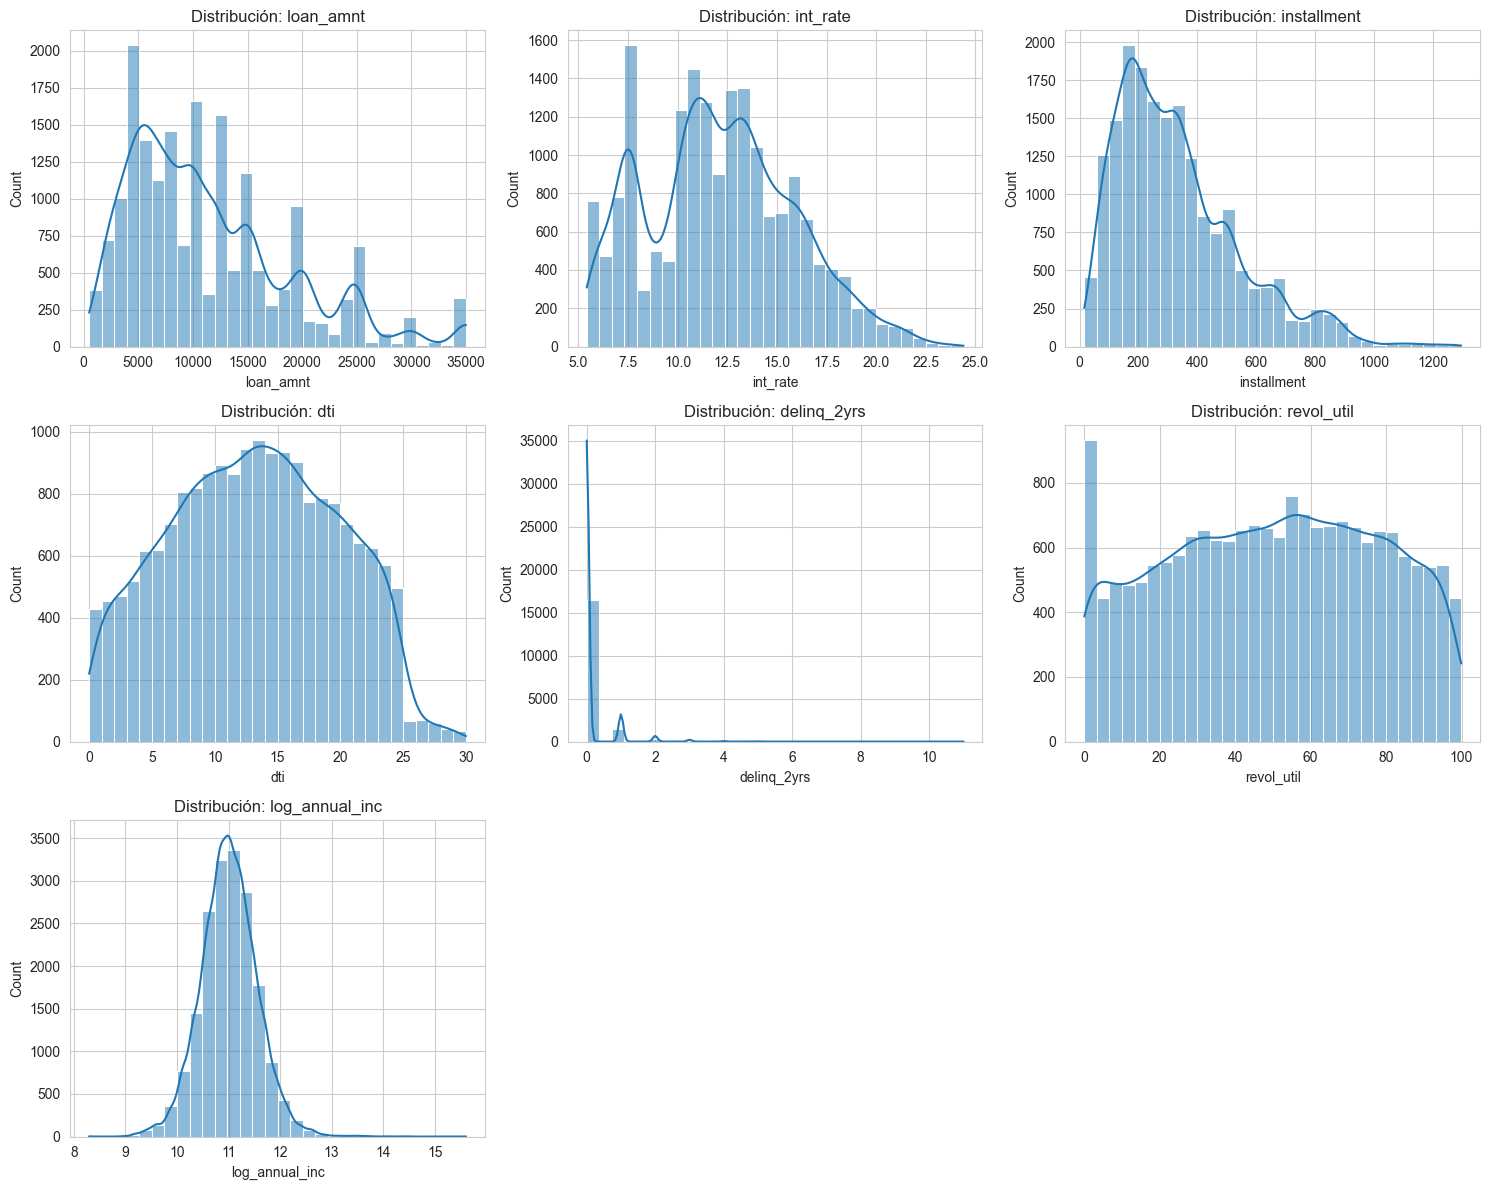

In [ ]:
# Configuración de estilo
sns.set_style("whitegrid")

# Definimos el tamaño del grid dinámicamente según la cantidad de variables numéricas
num_vars = len(numeric_cols)
cols = 3
rows = math.ceil(num_vars / cols)

# Creación de la figura
plt.figure(figsize=(15, 4 * rows))

for i, var in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    # Histograma con curva de densidad (KDE) para ver la forma de la distribución
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribución: {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

### 4.2 Boxplots

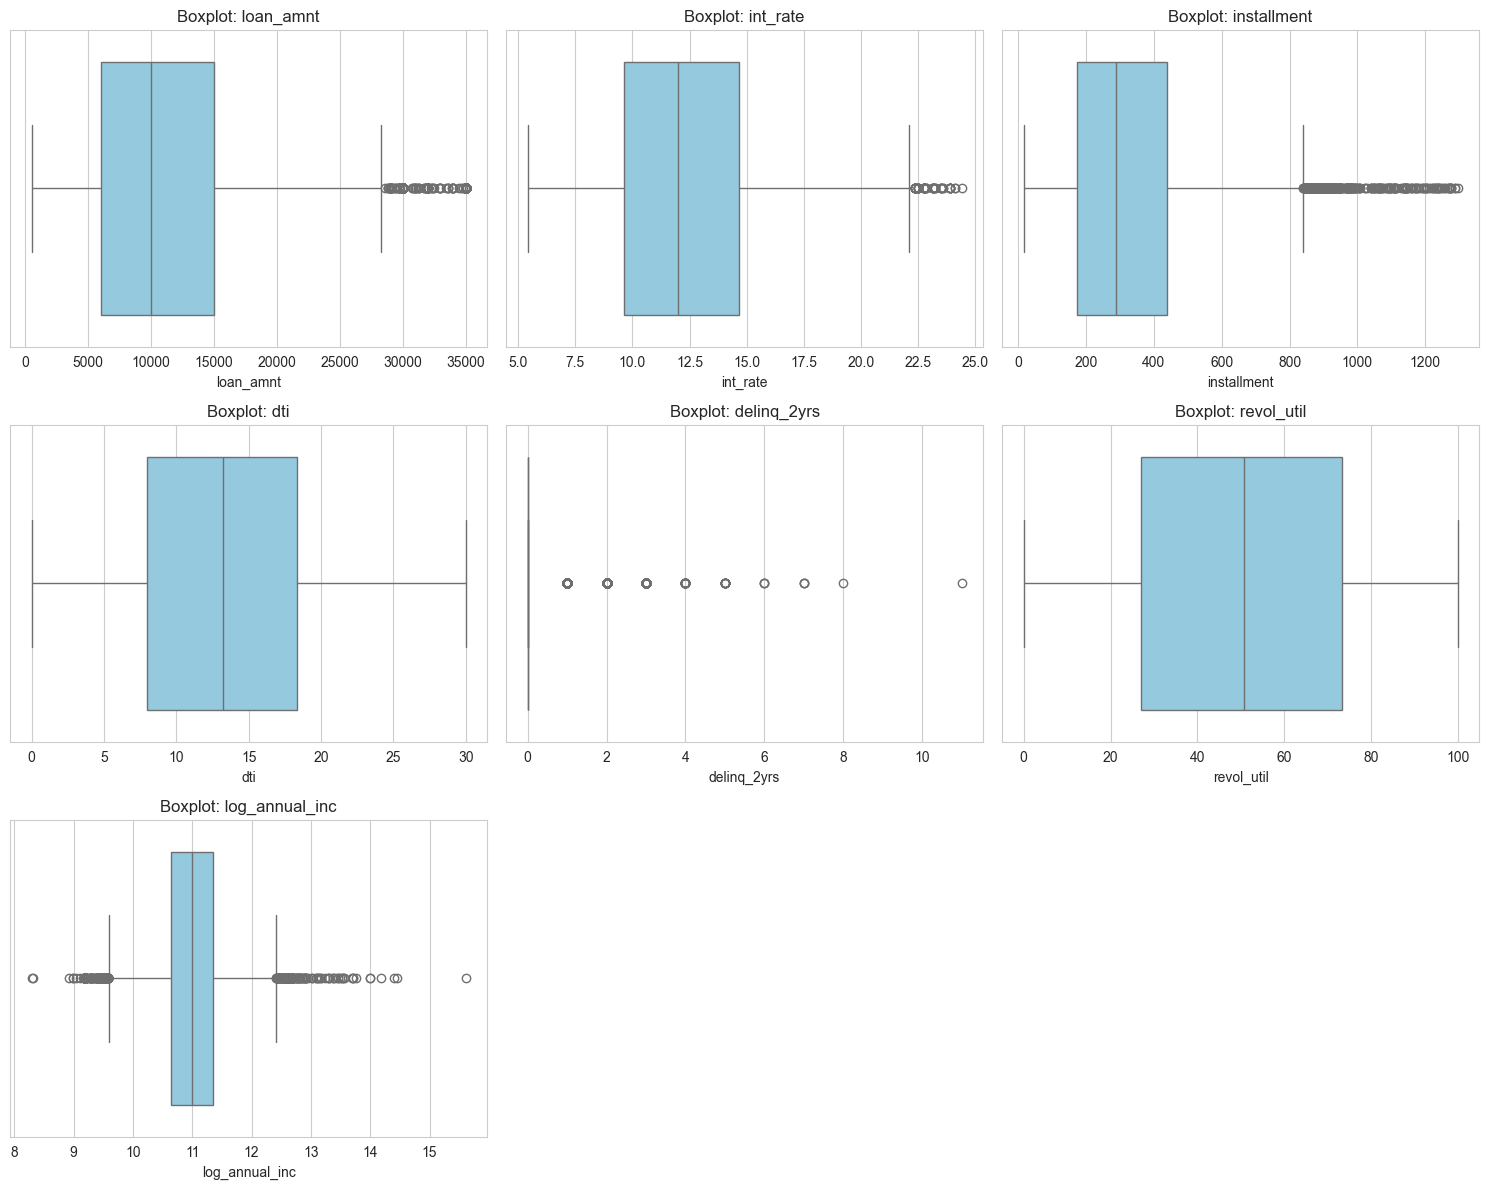

In [ ]:
# Creación de la figura para Boxplots
plt.figure(figsize=(15, 4 * rows))

for i, var in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    # Boxplot para visualizar rango intercuartílico y valores atípicos (puntos fuera de los bigotes)
    sns.boxplot(x=df[var], color='skyblue')
    plt.title(f'Boxplot: {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

### 4.3 Scatterplots

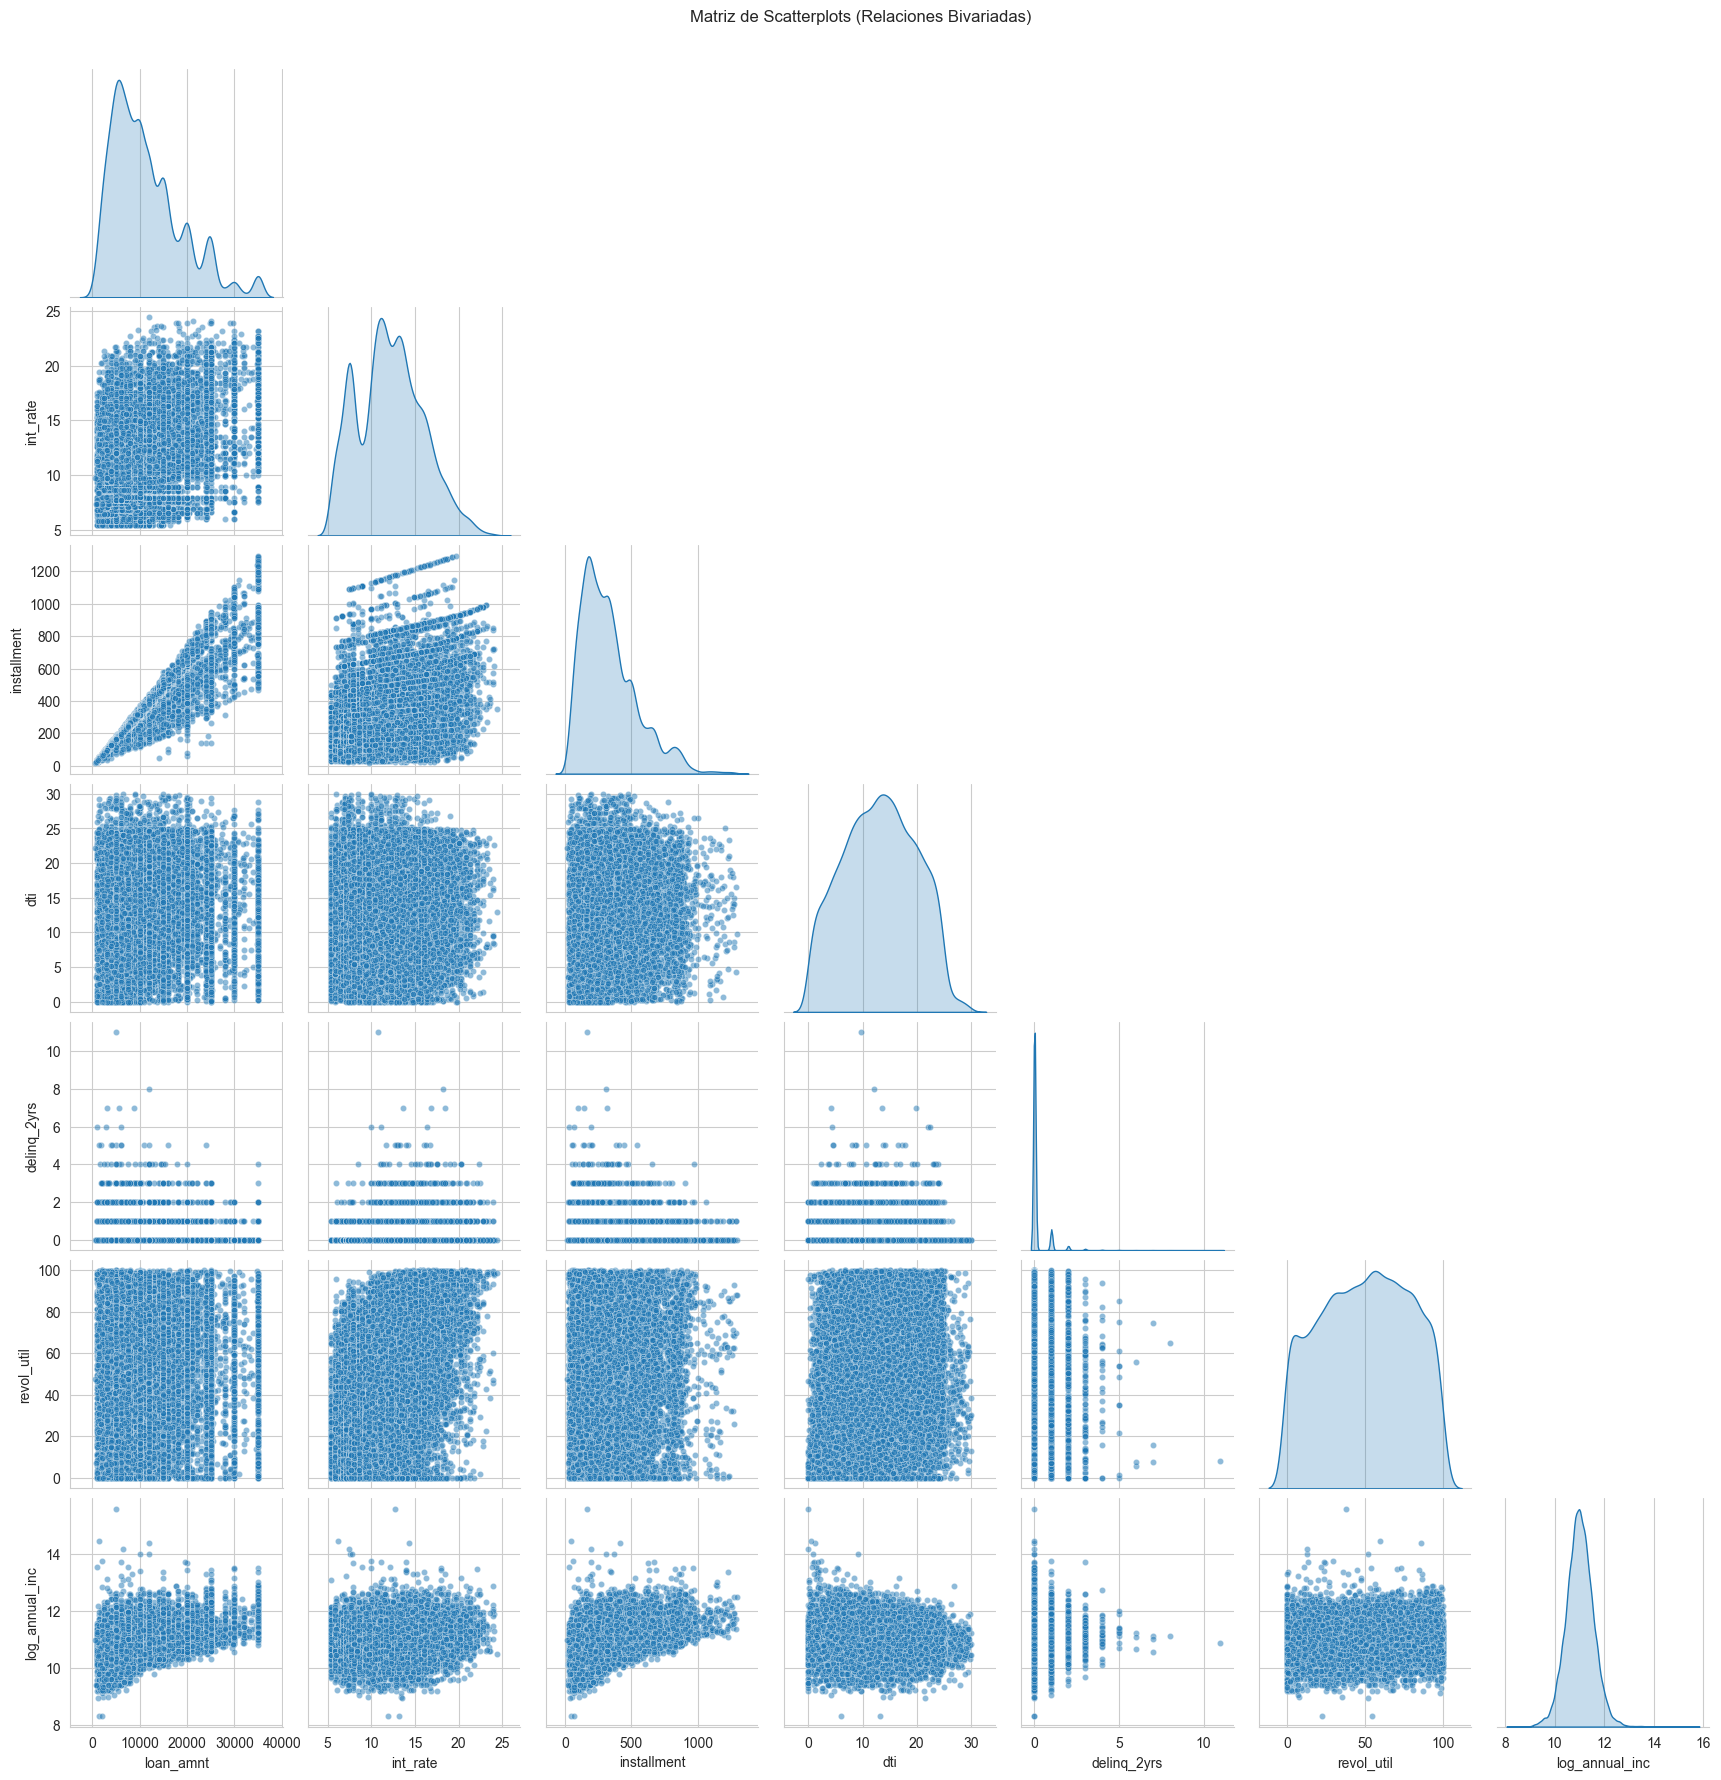

In [ ]:
# Utilizamos Pairplot para generar todos los scatterplots posibles entre variables numéricas
# Esto permite detectar linealidad y clusters en una sola ejecución
# corner=True evita duplicar gráficos (espejo) y diag_kind='kde' muestra la densidad en la diagonal
sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True, plot_kws={'alpha': 0.5, 's': 20})
plt.suptitle('Matriz de Scatterplots (Relaciones Bivariadas)', y=1.02)
plt.show()

### 4.4 Bar Plots (Frecuencia por Categoría)

C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\2995500758.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, order=df[var].value_counts().index, palette='viridis')
C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\2995500758.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, order=df[var].value_counts().index, palette='viridis')
C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\2995500758.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, order=df[var].value_counts().index, palet

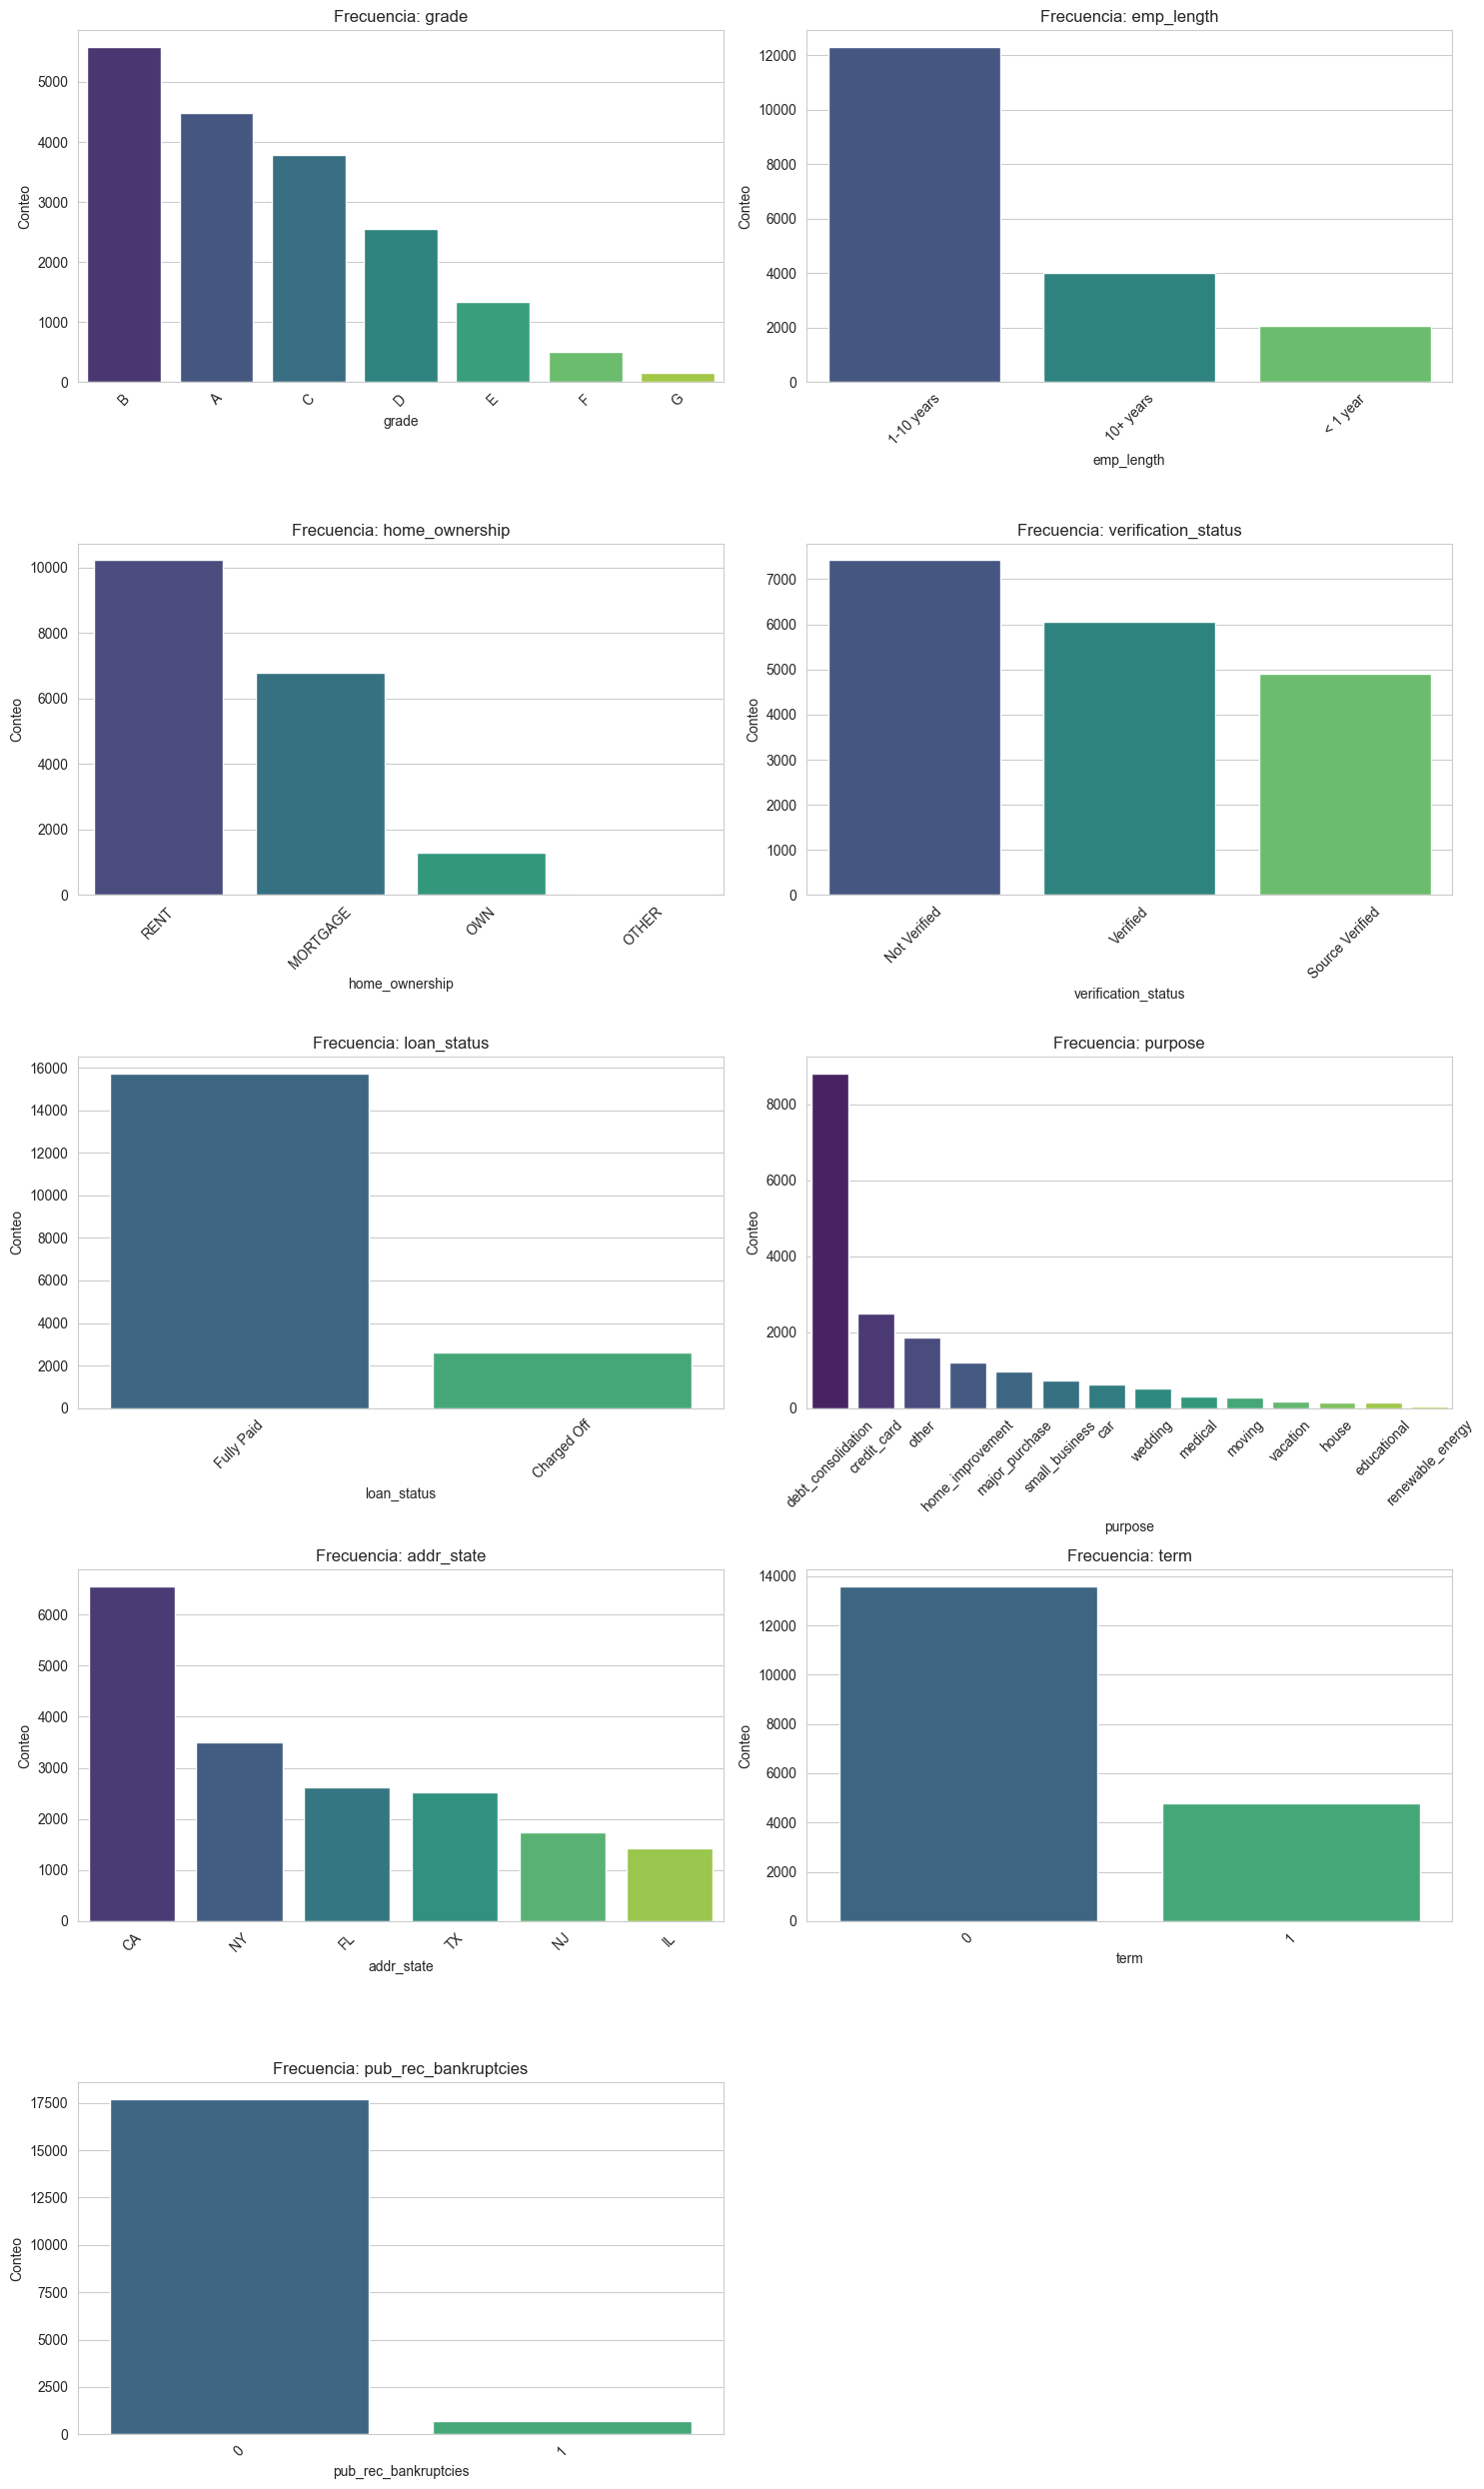

In [ ]:
# Configuración del grid para gráficos categóricos
# Calculamos filas necesarias según la cantidad de variables categóricas
num_cat = len(categorical_cols)
cols = 2  # 2 gráficos por fila para buena visibilidad
rows = math.ceil(num_cat / cols)

plt.figure(figsize=(15, 5 * rows))

for i, var in enumerate(categorical_cols):
    plt.subplot(rows, cols, i + 1)

    # Gráfico de conteo ordenado por frecuencia descendente
    sns.countplot(data=df, x=var, order=df[var].value_counts().index, palette='viridis')

    plt.title(f'Frecuencia: {var}')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45) # Rotación para leer mejor las etiquetas

plt.tight_layout()
plt.show()

## 5. EDA Bivariado

In [ ]:
# Creación de variable binaria para análisis de riesgo
# 1 = Charged Off (Bad), 0 = Fully Paid (Good)
df['target_def'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# Verificación de la proporción (Tasa base)
print(f"Tasa base de incumplimiento: {df['target_def'].mean():.2%}")

Tasa base de incumplimiento: 14.34%


### 5.1 Numéricas vs Target

C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\1323207737.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


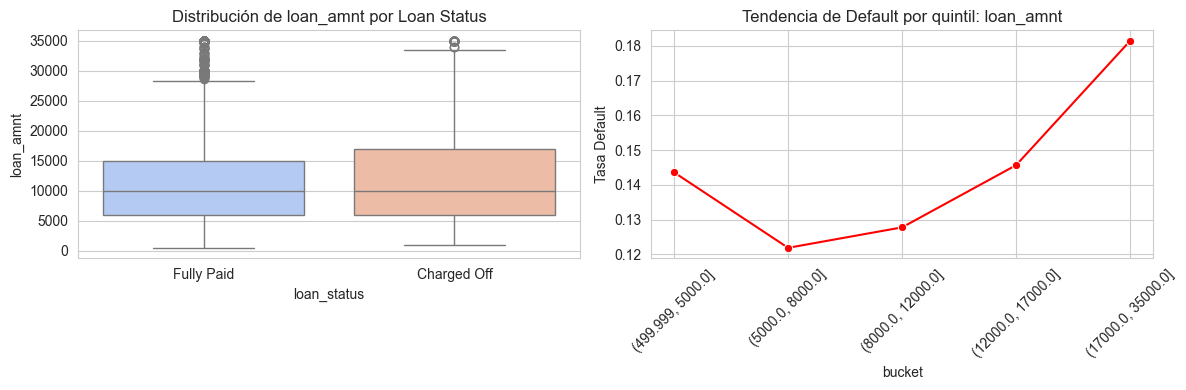

--- Análisis por Buckets: loan_amnt ---


,Tasa Default,N_Registros
bucket,,
"(499.999, 5000.0]",0.143582,4137
"(5000.0, 8000.0]",0.121872,3717
"(8000.0, 12000.0]",0.127763,4117
"(12000.0, 17000.0]",0.145662,2801
"(17000.0, 35000.0]",0.181439,3599


C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\1323207737.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


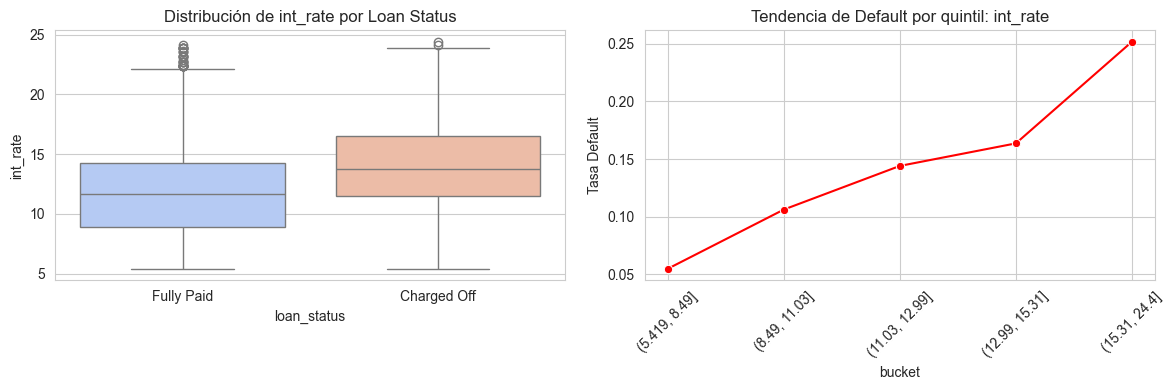

--- Análisis por Buckets: int_rate ---


,Tasa Default,N_Registros
bucket,,
"(5.419, 8.49]",0.054897,3880
"(8.49, 11.03]",0.106218,3474
"(11.03, 12.99]",0.144063,3672
"(12.99, 15.31]",0.163602,3698
"(15.31, 24.4]",0.251714,3647


C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\1323207737.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


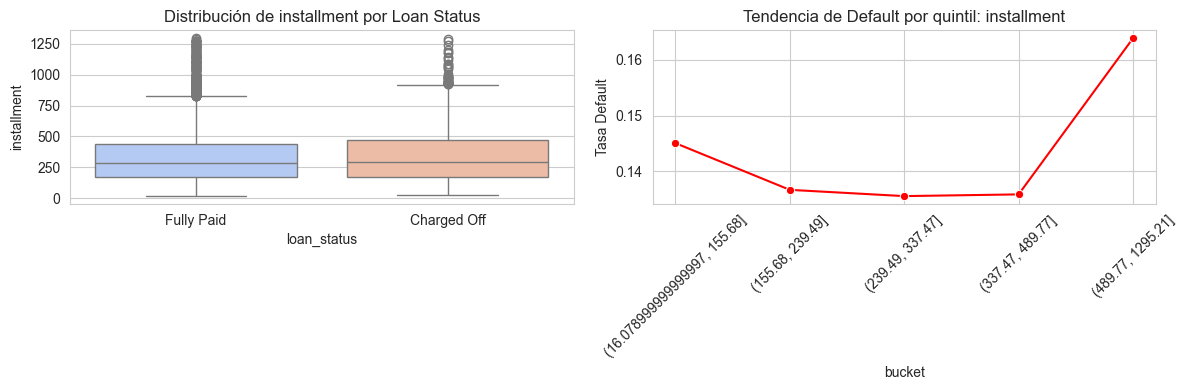

--- Análisis por Buckets: installment ---


,Tasa Default,N_Registros
bucket,,
"(16.078999999999997, 155.68]",0.145034,3675
"(155.68, 239.49]",0.136636,3674
"(239.49, 337.47]",0.135510,3675
"(337.47, 489.77]",0.135819,3674
"(489.77, 1295.21]",0.163899,3673


C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\1323207737.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


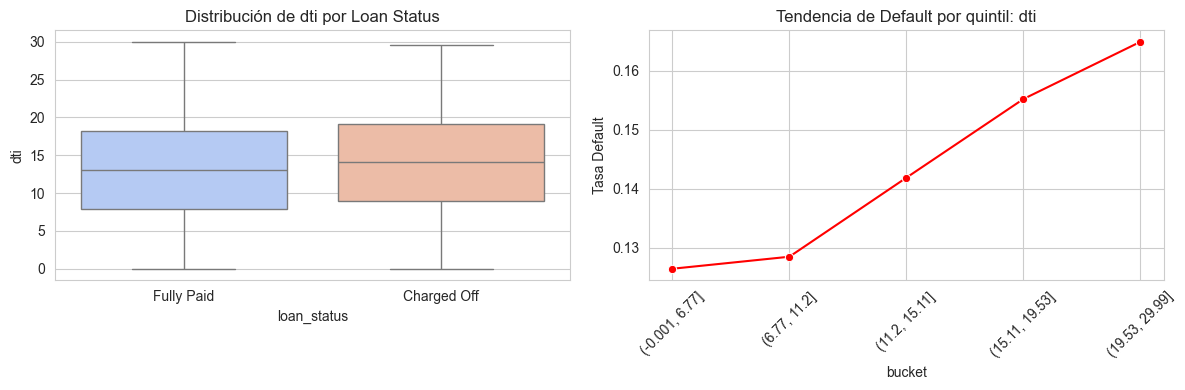

--- Análisis por Buckets: dti ---


,Tasa Default,N_Registros
bucket,,
"(-0.001, 6.77]",0.126462,3677
"(6.77, 11.2]",0.128498,3681
"(11.2, 15.11]",0.141883,3665
"(15.11, 19.53]",0.155205,3679
"(19.53, 29.99]",0.164895,3669


C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\1323207737.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


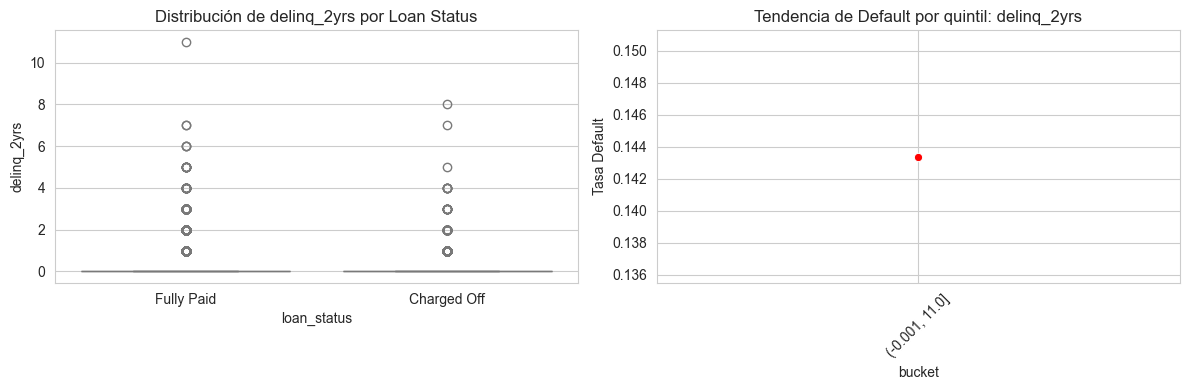

--- Análisis por Buckets: delinq_2yrs ---


,Tasa Default,N_Registros
bucket,,
"(-0.001, 11.0]",0.143378,18371


C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\1323207737.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


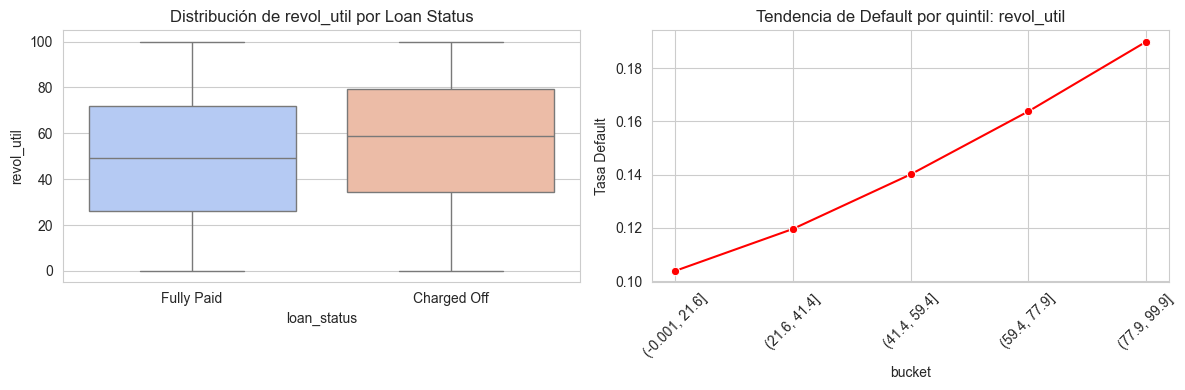

--- Análisis por Buckets: revol_util ---


,Tasa Default,N_Registros
bucket,,
"(-0.001, 21.6]",0.103833,3679
"(21.6, 41.4]",0.119586,3671
"(41.4, 59.4]",0.140065,3684
"(59.4, 77.9]",0.163716,3671
"(77.9, 99.9]",0.189853,3666


C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\1323207737.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


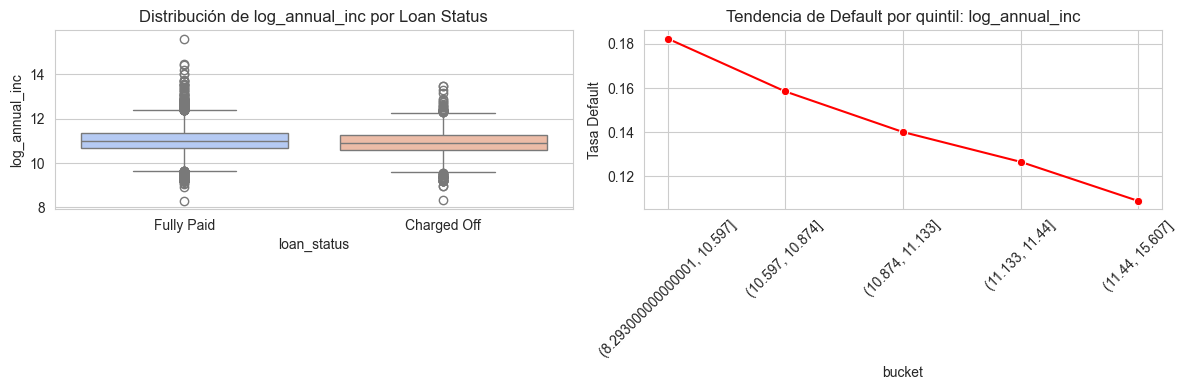

--- Análisis por Buckets: log_annual_inc ---


,Tasa Default,N_Registros
bucket,,
"(8.293000000000001, 10.597]",0.182452,3727
"(10.597, 10.874]",0.158473,3641
"(10.874, 11.133]",0.140082,3655
"(11.133, 11.44]",0.126562,3682
"(11.44, 15.607]",0.108838,3666


In [ ]:
# Análisis Bivariado: Numéricas vs Target
# Se generan Boxplots y Tablas de Tendencia por quintiles

for col in numeric_cols:
    # 1. Gráfico: Boxplot por clase (Separación de clases)
    plt.figure(figsize=(12, 4))

    # Subplot 1: Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')
    plt.title(f'Distribución de {col} por Loan Status')

    # 2. Tabla: Tasa por Buckets (Umbrales y no linealidad)
    # Creamos 5 grupos (quintiles). 'duplicates=drop' maneja variables con muchos valores repetidos (como 0)
    try:
        df['bucket'] = pd.qcut(df[col], q=5, duplicates='drop')
    except ValueError:
        # Fallback a 'cut' si qcut falla por distribución muy sesgada
        df['bucket'] = pd.cut(df[col], bins=5)

    bucket_analysis = df.groupby('bucket', observed=False)['target_def'].agg(['mean', 'count'])
    bucket_analysis.rename(columns={'mean': 'Tasa Default', 'count': 'N_Registros'}, inplace=True)

    # Subplot 2: Visualización de la tendencia de la tasa
    plt.subplot(1, 2, 2)
    sns.lineplot(data=bucket_analysis, x=bucket_analysis.index.astype(str), y='Tasa Default', marker='o', color='red')
    plt.xticks(rotation=45)
    plt.title(f'Tendencia de Default por quintil: {col}')

    plt.tight_layout()
    plt.show()

    # Mostrar la tabla numérica debajo de los gráficos
    print(f"--- Análisis por Buckets: {col} ---")
    display(bucket_analysis)

    # Limpieza auxiliar
    if 'bucket' in df.columns:
        df.drop(columns=['bucket'], inplace=True)

### 5.1 Categoricas vs Target

C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\3729889443.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_analysis.index, y=cat_analysis['Tasa Default'], palette='magma')


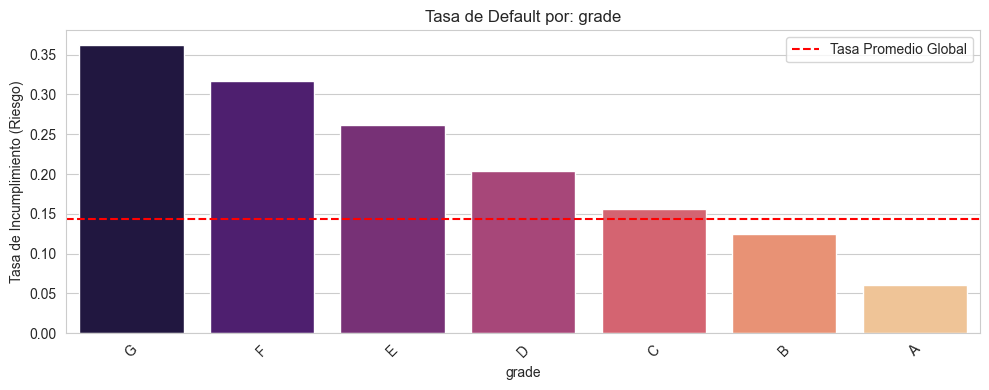

--- Detalle numérico: grade ---


,Tasa Default,N_Registros
grade,,
G,0.362416,149
F,0.316733,502
E,0.261815,1333
D,0.203297,2548
C,0.155779,3781
B,0.124754,5579
A,0.060058,4479


C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\3729889443.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_analysis.index, y=cat_analysis['Tasa Default'], palette='magma')


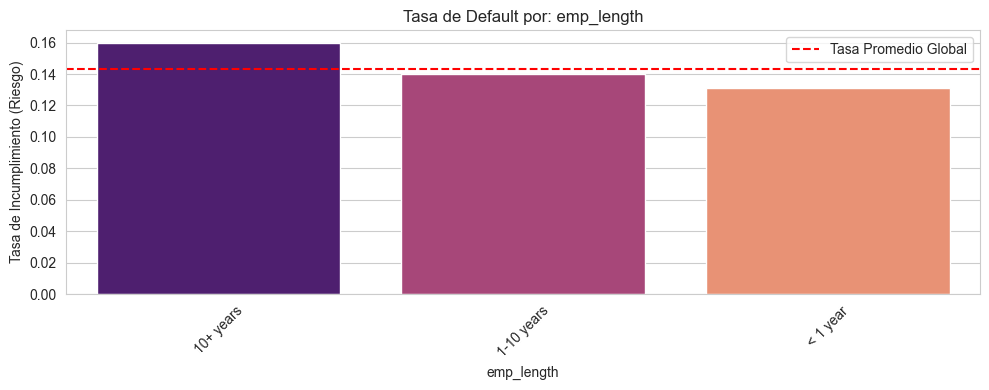

--- Detalle numérico: emp_length ---


,Tasa Default,N_Registros
emp_length,,
10+ years,0.159752,4025
1-10 years,0.140021,12291
< 1 year,0.131387,2055


C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\3729889443.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_analysis.index, y=cat_analysis['Tasa Default'], palette='magma')


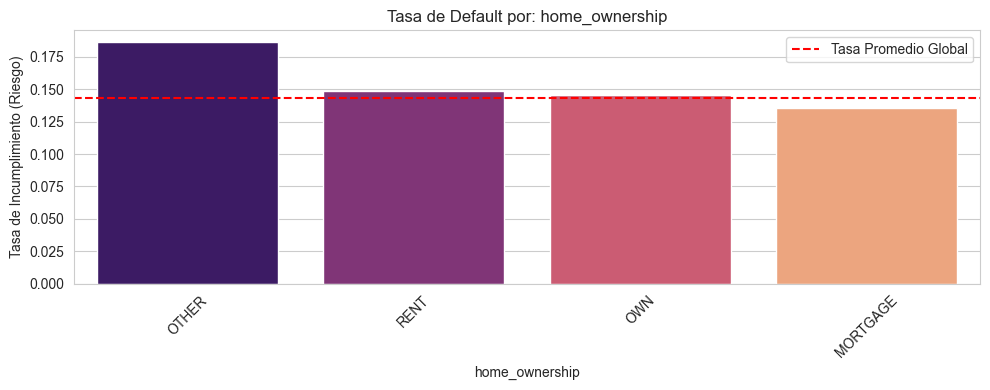

--- Detalle numérico: home_ownership ---


,Tasa Default,N_Registros
home_ownership,,
OTHER,0.186047,43
RENT,0.148333,10227
OWN,0.145482,1306
MORTGAGE,0.135247,6795


C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\3729889443.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_analysis.index, y=cat_analysis['Tasa Default'], palette='magma')


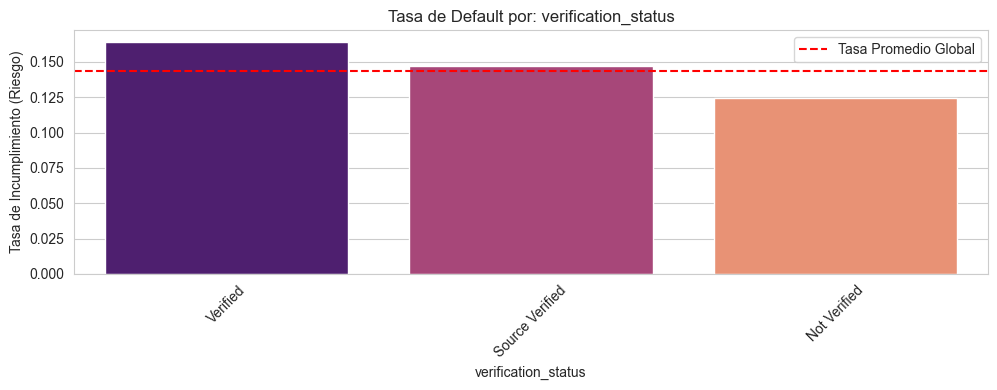

--- Detalle numérico: verification_status ---


,Tasa Default,N_Registros
verification_status,,
Verified,0.164075,6046
Source Verified,0.146789,4905
Not Verified,0.124259,7420


C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\3729889443.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_analysis.index, y=cat_analysis['Tasa Default'], palette='magma')


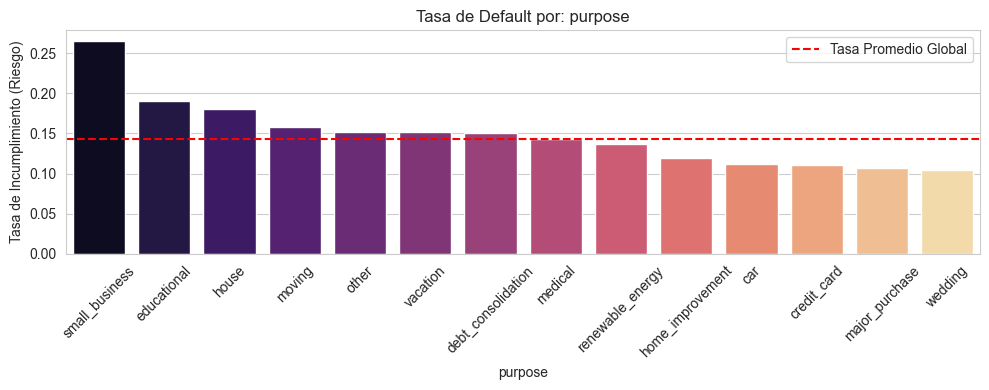

--- Detalle numérico: purpose ---


,Tasa Default,N_Registros
purpose,,
small_business,0.264910,721
educational,0.190141,142
house,0.180124,161
moving,0.157895,285
other,0.152081,1874
vacation,0.151685,178
debt_consolidation,0.150482,8825
medical,0.143302,321
renewable_energy,0.136364,44


C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\3729889443.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_analysis.index, y=cat_analysis['Tasa Default'], palette='magma')


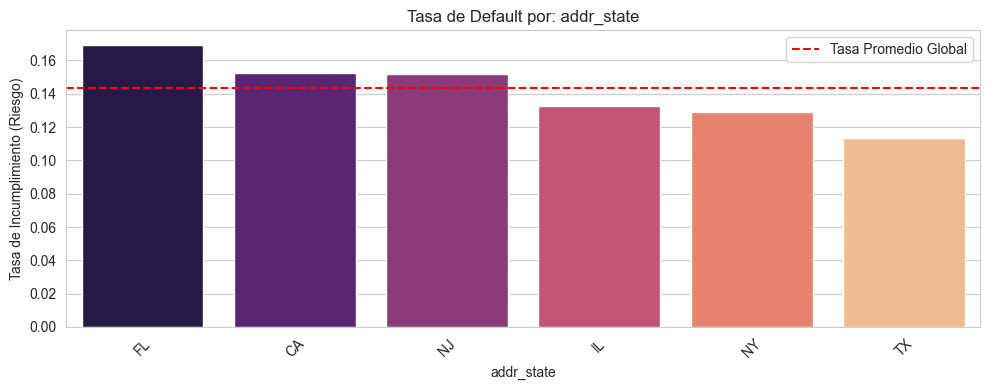

--- Detalle numérico: addr_state ---


,Tasa Default,N_Registros
addr_state,,
FL,0.169524,2625
CA,0.152273,6554
NJ,0.151935,1731
IL,0.132446,1427
NY,0.129032,3503
TX,0.113394,2531


C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\3729889443.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_analysis.index, y=cat_analysis['Tasa Default'], palette='magma')


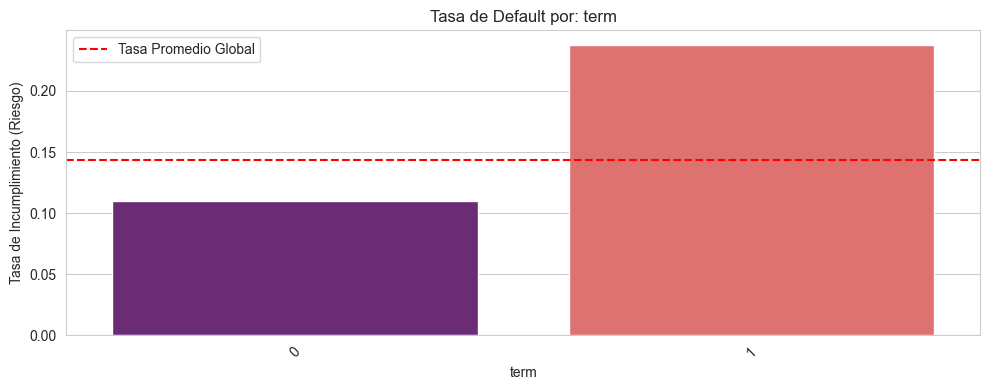

--- Detalle numérico: term ---


,Tasa Default,N_Registros
term,,
1,0.237618,4785
0,0.110187,13586


C:\Users\zadel\AppData\Local\Temp\ipykernel_31248\3729889443.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_analysis.index, y=cat_analysis['Tasa Default'], palette='magma')


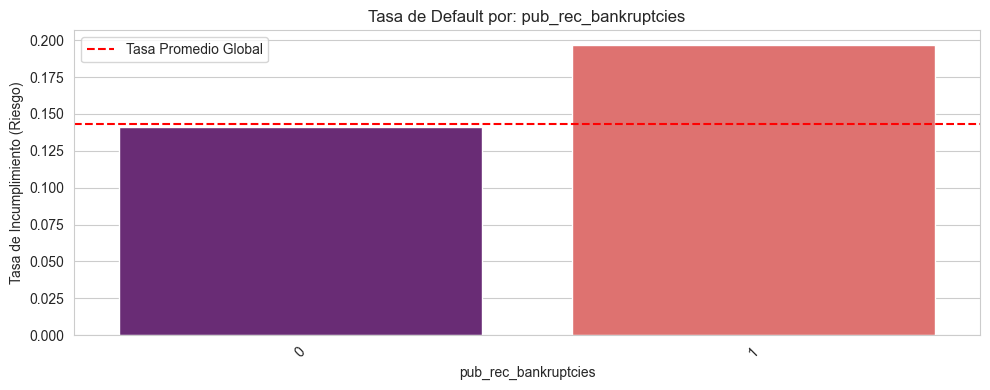

--- Detalle numérico: pub_rec_bankruptcies ---


,Tasa Default,N_Registros
pub_rec_bankruptcies,,
1,0.196746,676
0,0.141339,17695


In [ ]:
# Análisis Bivariado: Categóricas vs Target
# Se compara la tasa de incumplimiento promedio por cada categoría

for col in categorical_cols:
    # Ignoramos la variable target original para no compararla consigo misma
    if col == 'loan_status':
        continue

    plt.figure(figsize=(10, 4))

    # 1. Tabla: Cálculo de Tasa de Default y Conteo por grupo
    cat_analysis = df.groupby(col)['target_def'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
    cat_analysis.rename(columns={'mean': 'Tasa Default', 'count': 'N_Registros'}, inplace=True)

    # 2. Gráfico: Barplot de la Tasa de Default
    sns.barplot(x=cat_analysis.index, y=cat_analysis['Tasa Default'], palette='magma')
    plt.axhline(y=df['target_def'].mean(), color='r', linestyle='--', label='Tasa Promedio Global')

    plt.title(f'Tasa de Default por: {col}')
    plt.ylabel('Tasa de Incumplimiento (Riesgo)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Mostrar tabla de evidencia
    print(f"--- Detalle numérico: {col} ---")
    display(cat_analysis)